In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from pmdarima import auto_arima, ARIMA, model_selection
import numpy as np
from sklearn.model_selection import ParameterGrid

In [42]:
df1=pd.read_csv("daily_revenue.csv",index_col="date",parse_dates=True, dayfirst=True)

In [43]:
import seaborn as sns

In [44]:
df1.head()

,revenue,discount_rate,coupon_rate
date,,,
2018-01-01,"6,270,839",34.27%,1.09%
2018-01-02,"8,922,076",30.87%,1.08%
2018-01-03,"8,446,101",28.11%,1.01%
2018-01-04,"7,785,798",27.32%,0.96%
2018-01-05,"6,375,303",25.70%,0.90%


In [45]:
df1 = df1[df1.index < '2022-11-01']

In [46]:
df1

,revenue,discount_rate,coupon_rate
date,,,
2018-01-01,"6,270,839",34.27%,1.09%
2018-01-02,"8,922,076",30.87%,1.08%
2018-01-03,"8,446,101",28.11%,1.01%
2018-01-04,"7,785,798",27.32%,0.96%
2018-01-05,"6,375,303",25.70%,0.90%
...,...,...,...
2022-10-27,"13,714,667",20.81%,0.61%
2022-10-28,"12,100,780",21.44%,0.55%
2022-10-29,"11,849,363",19.81%,0.36%


In [47]:
df1.info

<bound method DataFrame.info of                revenue discount_rate coupon_rate
date                                            
2018-01-01   6,270,839        34.27%       1.09%
2018-01-02   8,922,076        30.87%       1.08%
2018-01-03   8,446,101        28.11%       1.01%
2018-01-04   7,785,798        27.32%       0.96%
2018-01-05   6,375,303        25.70%       0.90%
...                ...           ...         ...
2022-10-27  13,714,667        20.81%       0.61%
2022-10-28  12,100,780        21.44%       0.55%
2022-10-29  11,849,363        19.81%       0.36%
2022-10-30  14,561,144        20.41%       0.34%
2022-10-31  12,689,026        19.49%       0.35%

[1765 rows x 3 columns]>

In [39]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1765 entries, 2018-01-01 to 2022-10-31
Freq: D
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   y              1765 non-null   float64
 1   discount_rate  1765 non-null   object 
 2   coupon_rate    1765 non-null   object 
 3   Month          1765 non-null   object 
 4   Month_Num      1765 non-null   int32  
 5   y_diff         1764 non-null   float64
dtypes: float64(2), int32(1), object(3)
memory usage: 89.6+ KB


In [48]:
df1['revenue'] = df1['revenue'].str.replace(",", "").astype(float)

In [49]:
df1 = df1.asfreq("D")

In [50]:
# Change the time Series variable name
df1 = df1.rename(columns = {'revenue': 'y'})
df1.head()

,y,discount_rate,coupon_rate
date,,,
2018-01-01,6270839.0,34.27%,1.09%
2018-01-02,8922076.0,30.87%,1.08%
2018-01-03,8446101.0,28.11%,1.01%
2018-01-04,7785798.0,27.32%,0.96%
2018-01-05,6375303.0,25.70%,0.90%


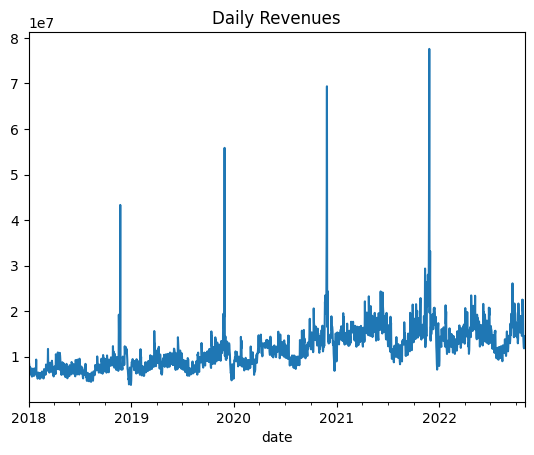

In [51]:
# Daily revenues line plot
df1['y'].plot(title = 'Daily Revenues')
plt.show()

C:\Users\Nitish Singh\AppData\Local\Temp\ipykernel_14836\2694356963.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  month_plot(df1['y'].resample('M').mean(),


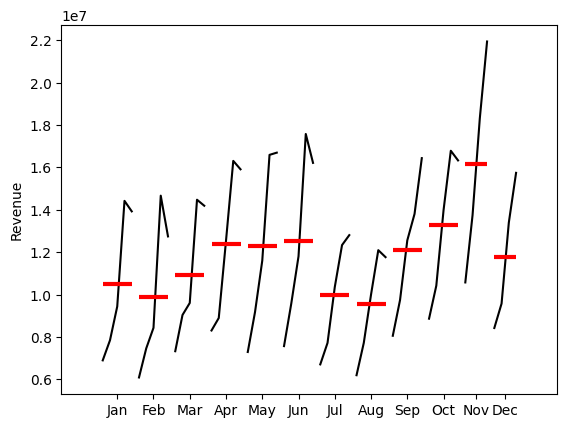

In [53]:
# month_plot() - To visualize the average value for each month across multiple years in a time series
# red lines - Represents the mean value for each month

# Plotting the monthly seasonality of revenue values
month_plot(df1['y'].resample('M').mean(),
           ylabel = 'Revenue')
plt.show()

C:\Users\Nitish Singh\AppData\Local\Temp\ipykernel_14836\4267824500.py:6: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarter_plot(df1['y'].resample('Q').mean(),


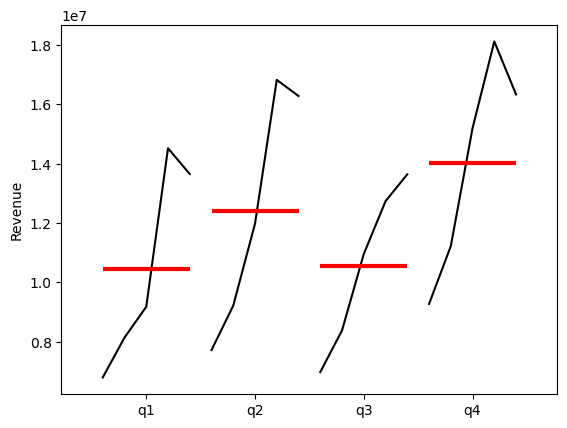

In [56]:
# quarter_plot() - To visualize seasonal patterns at a quarterly level.
# Q1 (january, february, march), Q2 (april, may, june), Q3 (july, august, september), Q4 (october, november, december)

# Plotting the quarterly seasonality of revenue values
# .resample('Q') - to convert the time series data into quarterly seasonality
quarter_plot(df1['y'].resample('Q').mean(),
           ylabel = 'Revenue')
plt.show()

C:\Users\Nitish Singh\AppData\Local\Temp\ipykernel_14836\4242497915.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Month', y='y', data=df2, palette='Set3')


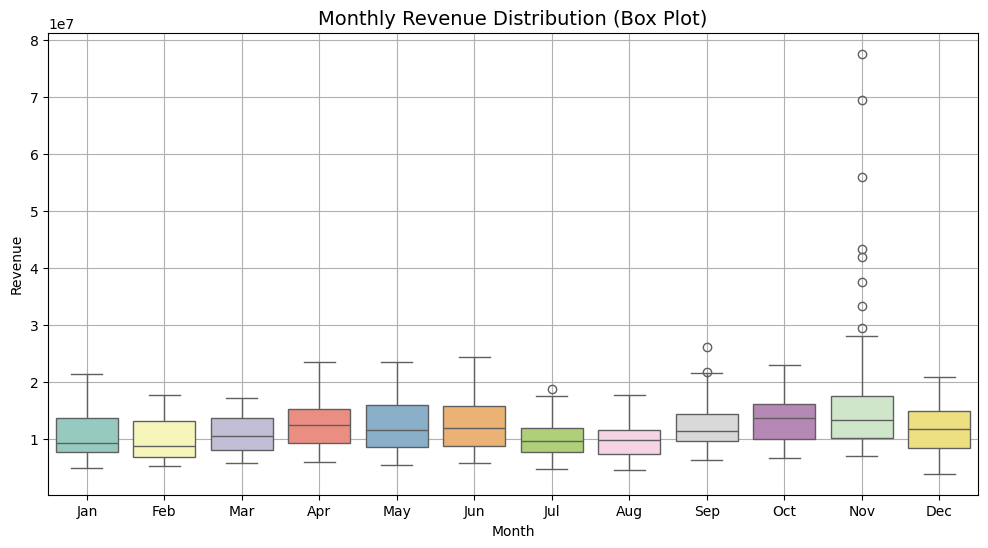

In [57]:
df1.index = pd.to_datetime(df1.index)

# Create a month and month number column from the index
df1['Month'] = df1.index.strftime('%b')         # e.g., Jan, Feb, etc.
df1['Month_Num'] = df1.index.month              # numeric month for sorting

# Sort the dataframe so months appear in order on the plot
df2 = df1.sort_values('Month_Num')

# Plot
plt.figure(figsize=(12,6))
sns.boxplot(x='Month', y='y', data=df2, palette='Set3')

plt.title('Monthly Revenue Distribution (Box Plot)', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

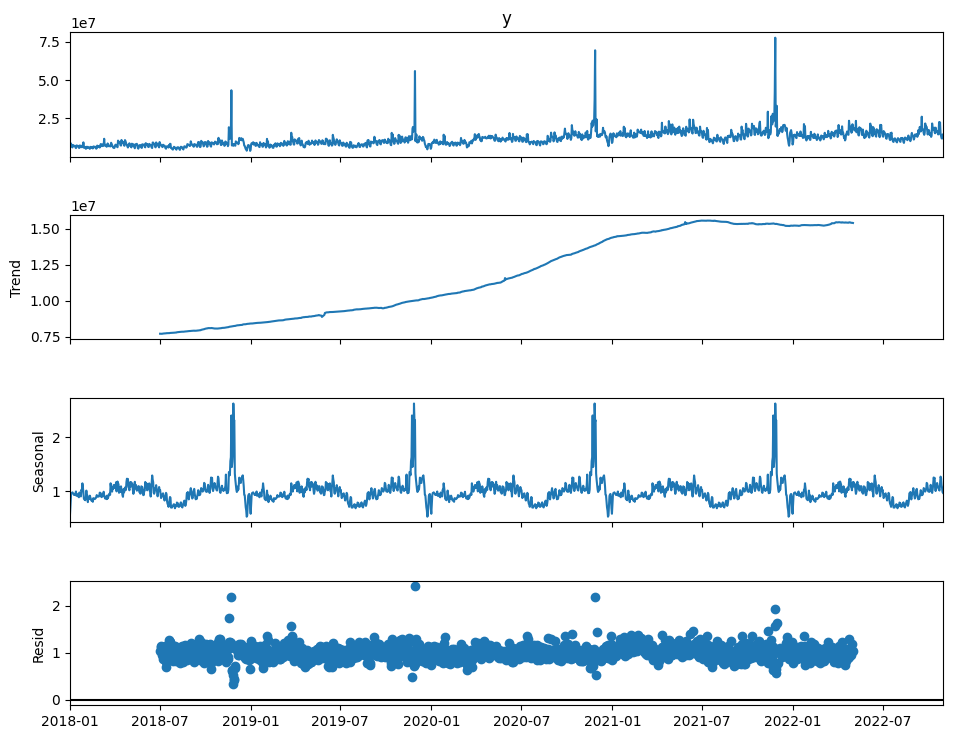

In [58]:
# Seasonal Decomposition Plots for Revenue Data
# Multiplicative model type, with daily seasonality (365 days)
decomposition = seasonal_decompose(df1['y'],
                                   model = 'mul',
                                   period = 365)
fig = decomposition.plot()
fig.set_size_inches(10,8)
plt.show()

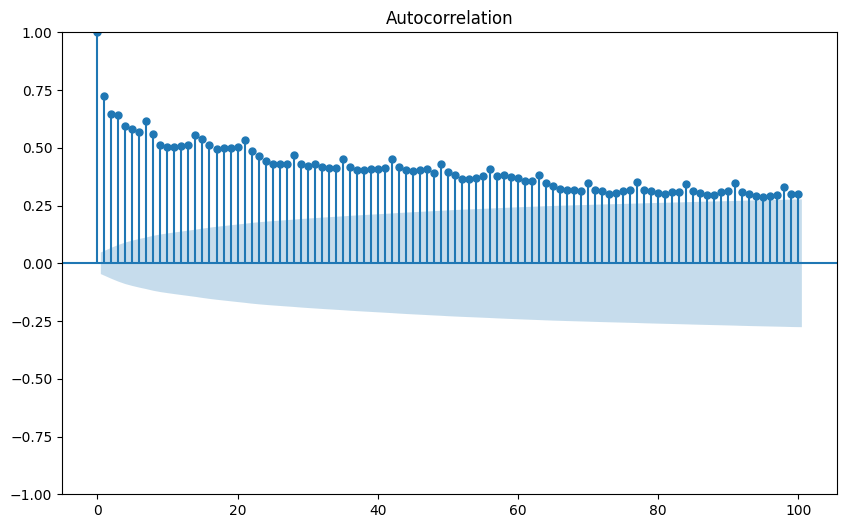

In [59]:
# Plot the autocorrelation (ACF) of revenue values
fig, ax = plt.subplots(figsize = (10,6))
plot_acf(df1['y'], lags = 100, ax = ax)
plt.show()

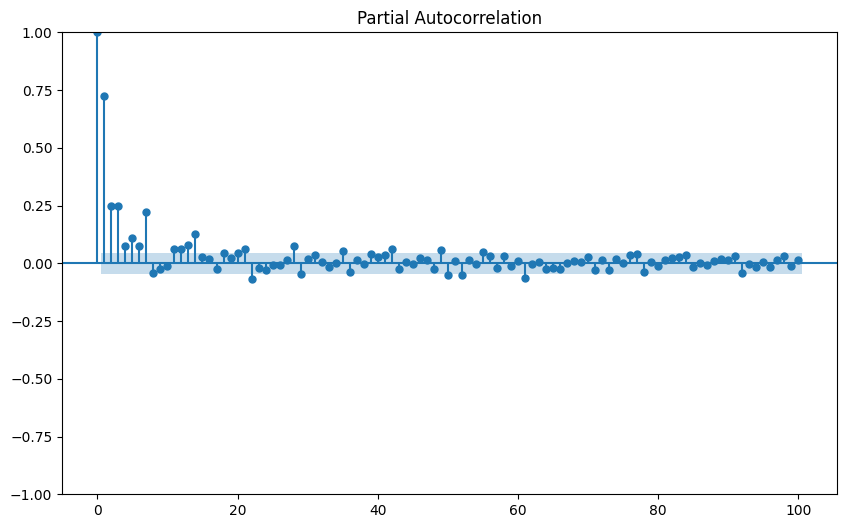

In [60]:
# Plot the partial autocorrelation (PACF) of revenue values
fig, ax = plt.subplots(figsize = (10,6))
plot_pacf(df1['y'], lags = 100, ax = ax)
plt.show()

In [61]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
# 'result' contains the test statistic and the p-value.
result = adfuller(df1.y)
print('p-value: %f' % result[1])

# Interpreting the results
if result[1] < 0.05:
    print("Evidence suggests that the time series is stationary.")
else:
    print("Evidence suggests that the time series is not stationary.")

p-value: 0.018962
Evidence suggests that the time series is stationary.


In [62]:
# Compute the first difference of the 'y' column in DataFrame 'df' and assign it to a new column 'y_diff'.
# '.diff()' calculates the difference between consecutive elements along the specified axis (by default axis 0).
# 'dropna()' removes any rows with NaN values resulting from differencing.
df1['y_diff'] = df1.y.diff().dropna()
df1['y_diff']

date
2018-01-01          NaN
2018-01-02    2651237.0
2018-01-03    -475975.0
2018-01-04    -660303.0
2018-01-05   -1410495.0
                ...    
2022-10-27   -1352362.0
2022-10-28   -1613887.0
2022-10-29    -251417.0
2022-10-30    2711781.0
2022-10-31   -1872118.0
Freq: D, Name: y_diff, Length: 1765, dtype: float64

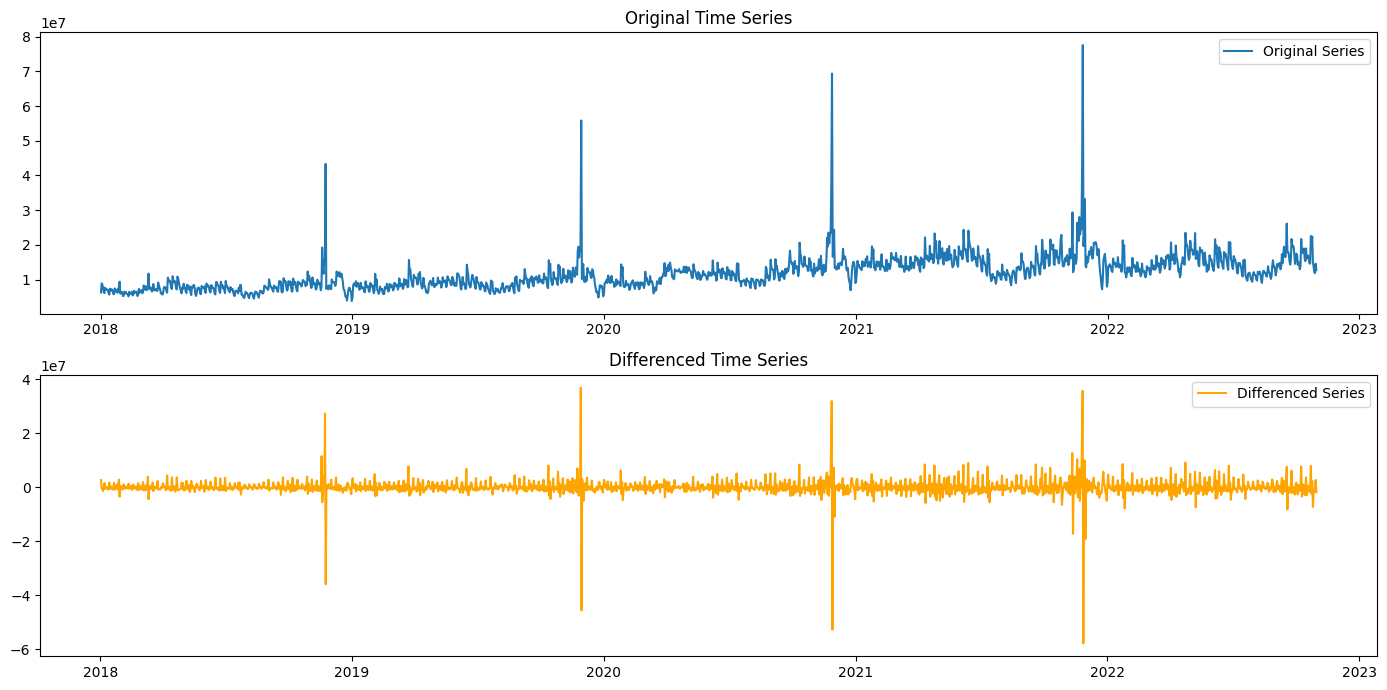

In [63]:
# Plotting the original and differenced series
# Set the size of the plot to 14 inches by 7 inches
plt.figure(figsize=(14, 7))

# Subplot for the original series
plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st subplot
plt.plot(df1.y, label='Original Series')
plt.title('Original Time Series')
plt.legend()

# Subplot for the differenced series
plt.subplot(2, 1, 2)  # 2 rows, 1 column, 2nd subplot
plt.plot(df1['y_diff'], label='Differenced Series', color='orange')
plt.title('Differenced Time Series')
plt.legend()

# Adjust layout to prevent overlapping of titles and labels
plt.tight_layout()
plt.show()

In [64]:
# Perform ADF test without null values
# 'result' contains the test statistic and the p-value.
result = adfuller(df1['y_diff'].dropna())
print('p-value: %f' % result[1])

# Interpreting the results
if result[1] < 0.05:
    print("Evidence suggests that the time series is stationary.")
else:
    print("Evidence suggests that the time series is not stationary.")

p-value: 0.000000
Evidence suggests that the time series is stationary.


In [65]:
# Split the Data into training and test
test_days = 60 # Number of days to reserve for testing
train, test = df1.iloc[:-test_days], df1.iloc[-test_days:]
test

,y,discount_rate,coupon_rate,Month,Month_Num,y_diff
date,,,,,,
2022-09-02,11193989.0,19.37%,0.27%,Sep,9,-1656742.0
2022-09-03,12148161.0,20.04%,0.34%,Sep,9,954172.0
2022-09-04,14469151.0,19.38%,0.37%,Sep,9,2320990.0
2022-09-05,13637744.0,17.27%,0.31%,Sep,9,-831407.0
2022-09-06,14277776.0,18.38%,0.34%,Sep,9,640032.0
2022-09-07,14697261.0,20.75%,0.33%,Sep,9,419485.0
2022-09-08,14757350.0,19.95%,0.26%,Sep,9,60089.0
2022-09-09,12965932.0,19.19%,0.25%,Sep,9,-1791418.0
2022-09-10,13861262.0,18.88%,0.23%,Sep,9,895330.0


In [72]:

df1 = df1.drop(['Month', 'Month_Num'], axis=1)

In [73]:
df1.head()

,y,discount_rate,coupon_rate,y_diff
date,,,,
2018-01-01,6270839.0,34.27%,1.09%,NaN
2018-01-02,8922076.0,30.87%,1.08%,2651237.0
2018-01-03,8446101.0,28.11%,1.01%,-475975.0
2018-01-04,7785798.0,27.32%,0.96%,-660303.0
2018-01-05,6375303.0,25.70%,0.90%,-1410495.0


In [74]:
df1.info

<bound method DataFrame.info of                      y discount_rate coupon_rate     y_diff
date                                                       
2018-01-01   6270839.0        34.27%       1.09%        NaN
2018-01-02   8922076.0        30.87%       1.08%  2651237.0
2018-01-03   8446101.0        28.11%       1.01%  -475975.0
2018-01-04   7785798.0        27.32%       0.96%  -660303.0
2018-01-05   6375303.0        25.70%       0.90% -1410495.0
...                ...           ...         ...        ...
2022-10-27  13714667.0        20.81%       0.61% -1352362.0
2022-10-28  12100780.0        21.44%       0.55% -1613887.0
2022-10-29  11849363.0        19.81%       0.36%  -251417.0
2022-10-30  14561144.0        20.41%       0.34%  2711781.0
2022-10-31  12689026.0        19.49%       0.35% -1872118.0

[1765 rows x 4 columns]>

In [75]:
model = auto_arima(train['y'],
                   seasonal = False)
model.summary()

c:\Users\Nitish Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Nitish Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Nitish Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Nitish Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Nitish Singh\AppData\Local\Programs\Python\Python31

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1705
Model:               SARIMAX(5, 1, 2)   Log Likelihood              -27842.998
Date:                Sat, 19 Apr 2025   AIC                          55701.995
Time:                        16:21:24   BIC                          55745.521
Sample:                    01-01-2018   HQIC                         55718.107
                         - 09-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4099      0.126     -3.249      0.001      -0.657      -0.163
ar.L2          0.2993      0.055      5.414      0.000       0.191       0.408
ar.L3          0.1613      0.028      5.767      0.000       0.106       0.216
ar.L4          0.0714      0.030      2.388      0.017       0.013       0.130
ar.L5          0.0492      0.025      2.005      0.045       0.001       0.097
ma.L1         -0.1688      0.124     -1.357      0.175      -0.412       0.075
ma.L2         -0.7393      0.115     -6.446      0.000      -0.964      -0.514
sigma2      9.184e+12   1.87e-14   4.91e+26      0.000    9.18e+12    9.18e+12
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            590831.06
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               2.92   Skew:                             5.33
Prob(H) (two-sided):                  0.00   Kurtosis:                        93.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.6e+42. Standard errors may be unstable.
"""

In [77]:
predictions_arima = model.predict(n_periods = len(test))
predictions_arima

c:\Users\Nitish Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


2022-09-02    1.282271e+07
2022-09-03    1.283112e+07
2022-09-04    1.258781e+07
2022-09-05    1.262190e+07
2022-09-06    1.249152e+07
2022-09-07    1.251513e+07
2022-09-08    1.245498e+07
2022-09-09    1.245612e+07
2022-09-10    1.243383e+07
2022-09-11    1.242887e+07
2022-09-12    1.242128e+07
2022-09-13    1.241643e+07
2022-09-14    1.241381e+07
2022-09-15    1.241076e+07
2022-09-16    1.240966e+07
2022-09-17    1.240805e+07
2022-09-18    1.240746e+07
2022-09-19    1.240670e+07
2022-09-20    1.240635e+07
2022-09-21    1.240600e+07
2022-09-22    1.240579e+07
2022-09-23    1.240563e+07
2022-09-24    1.240552e+07
2022-09-25    1.240544e+07
2022-09-26    1.240538e+07
2022-09-27    1.240534e+07
2022-09-28    1.240531e+07
2022-09-29    1.240529e+07
2022-09-30    1.240528e+07
2022-10-01    1.240527e+07
2022-10-02    1.240526e+07
2022-10-03    1.240525e+07
2022-10-04    1.240525e+07
2022-10-05    1.240525e+07
2022-10-06    1.240525e+07
2022-10-07    1.240524e+07
2022-10-08    1.240524e+07
2

In [78]:
def model_assessment(train, test, predictions, chart_title):
  # Set the size of the plot to 10 inches by 4 inches
  plt.figure(figsize = (10,4))
  # Plot the train, test, and forecast data
  plt.plot(train, label = 'Train')
  plt.plot(test, label = 'Test')
  plt.plot(predictions, label = "Forecast")
  # add title and legend to the plot
  plt.title(f"Train, Test and Predictions with {chart_title}")
  plt.legend()
  plt.show()

  # Calculating the MAE, RMSE, and MAPE
  mae = mean_absolute_error(test, predictions)
  mse = mean_squared_error(test, predictions)
  mape = mean_absolute_percentage_error(test, predictions)

  # Print the calculated error metrics
  print(f"The MAE is {mae:.2f}")
  print(f"The MSE is {mse:.2f}")
  print(f"The MAPE is {100 * mape:.2f} %")

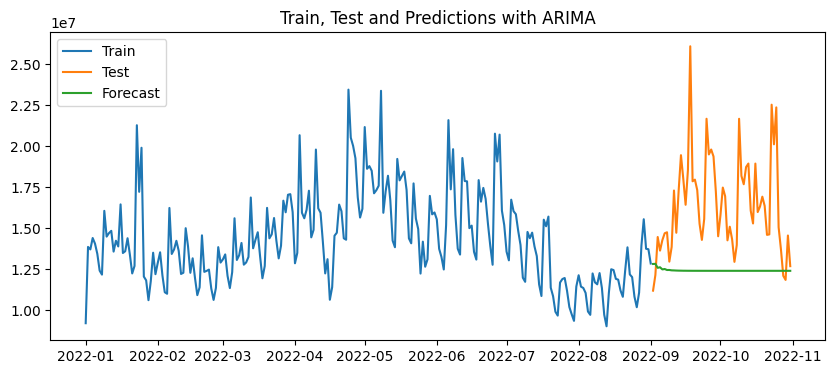

The MAE is 4118755.36
The MSE is 24914302937853.96
The MAPE is 22.97 %


In [79]:
model_assessment(train['y']['2022':], test['y'], predictions_arima, "ARIMA")

In [81]:
model_sarima = auto_arima(train['y'],
                          m = 7)
model_sarima.summary()

c:\Users\Nitish Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Nitish Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Nitish Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Nitish Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Nitish Singh\AppData\Local\Programs\Python\Python31

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                 1705
Model:             SARIMAX(5, 1, 4)x(2, 0, [1, 2], 7)   Log Likelihood              -27786.300
Date:                                Sat, 19 Apr 2025   AIC                          55602.601
Time:                                        16:29:54   BIC                          55684.212
Sample:                                    01-01-2018   HQIC                         55632.810
                                         - 09-01-2022                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.327e+04   7936.321      1.672      0.094   -2282.042    2.88e+04
ar.L1         -0.4511      0.156     -2.895      0.004      -0.757      -0.146
ar.L2         -0.6397      0.116     -5.504      0.000      -0.868      -0.412
ar.L3         -0.1989      0.167     -1.191      0.234      -0.526       0.128
ar.L4          0.2573      0.045      5.748      0.000       0.170       0.345
ar.L5          0.0998      0.042      2.358      0.018       0.017       0.183
ma.L1         -0.1109      0.157     -0.704      0.481      -0.419       0.198
ma.L2          0.2111      0.176      1.203      0.229      -0.133       0.555
ma.L3         -0.1624      0.195     -0.834      0.404      -0.544       0.219
ma.L4         -0.5561      0.101     -5.494      0.000      -0.754      -0.358
ar.S.L7        0.1437      0.406      0.354      0.724      -0.653       0.940
ar.S.L14       0.8158      0.395      2.067      0.039       0.042       1.589
ma.S.L7       -0.0720      0.387     -0.186      0.852      -0.830       0.686
ma.S.L14      -0.7885      0.357     -2.209      0.027      -1.488      -0.089
sigma2      9.388e+12      0.000   5.38e+16      0.000    9.39e+12    9.39e+12
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):            858403.54
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               2.70   Skew:                             5.65
Prob(H) (two-sided):                  0.00   Kurtosis:                       112.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.47e+31. Standard errors may be unstable.
"""

In [82]:
# Use the fitted SARIMA model to forecast future values.
# set the number of periods to forecast to the length of 'test'
predictions_sarima = model_sarima.predict(n_periods = len(test))
predictions_sarima

c:\Users\Nitish Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


2022-09-02    1.170564e+07
2022-09-03    1.165773e+07
2022-09-04    1.409821e+07
2022-09-05    1.394181e+07
2022-09-06    1.370836e+07
2022-09-07    1.332409e+07
2022-09-08    1.281915e+07
2022-09-09    1.200533e+07
2022-09-10    1.181824e+07
2022-09-11    1.437748e+07
2022-09-12    1.409137e+07
2022-09-13    1.395269e+07
2022-09-14    1.357157e+07
2022-09-15    1.309459e+07
2022-09-16    1.230773e+07
2022-09-17    1.213621e+07
2022-09-18    1.465784e+07
2022-09-19    1.446647e+07
2022-09-20    1.429493e+07
2022-09-21    1.390375e+07
2022-09-22    1.345800e+07
2022-09-23    1.269606e+07
2022-09-24    1.251539e+07
2022-09-25    1.496173e+07
2022-09-26    1.472163e+07
2022-09-27    1.459813e+07
2022-09-28    1.422591e+07
2022-09-29    1.377376e+07
2022-09-30    1.304061e+07
2022-10-01    1.288590e+07
2022-10-02    1.529096e+07
2022-10-03    1.510418e+07
2022-10-04    1.496286e+07
2022-10-05    1.459909e+07
2022-10-06    1.416877e+07
2022-10-07    1.344765e+07
2022-10-08    1.329263e+07
2

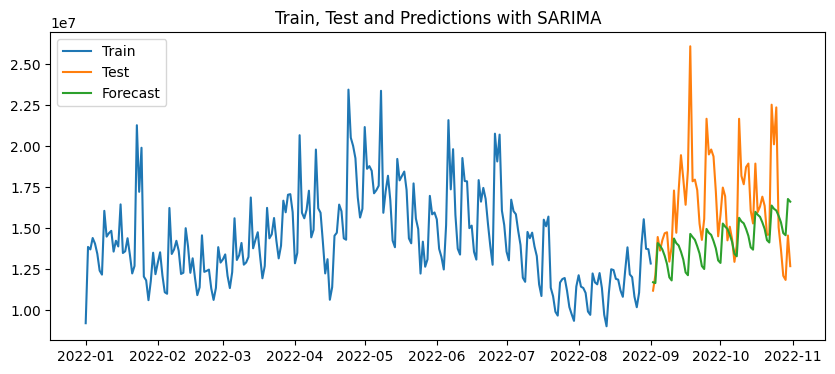

The MAE is 2710263.55
The MSE is 12050783343823.00
The MAPE is 15.26 %


In [83]:
# Model assessment
model_assessment(train['y']['2022':], test['y'], predictions_sarima, "SARIMA")

In [84]:
# Remove '%' symbol from 'discount_rate' and 'coupon_rate' column and convert to float
df1['discount_rate'] = df1['discount_rate'].str.replace("%", "").astype(float)
df1['coupon_rate'] = df1['coupon_rate'].str.replace("%", "").astype(float)

# Print the information about the DataFrame
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1765 entries, 2018-01-01 to 2022-10-31
Freq: D
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   y              1765 non-null   float64
 1   discount_rate  1765 non-null   float64
 2   coupon_rate    1765 non-null   float64
 3   y_diff         1764 non-null   float64
dtypes: float64(4)
memory usage: 68.9 KB


In [85]:
test_days = 60 # Number of days to reserve for testing
exog_train, exog_test = df1.iloc[:-test_days,1:3], df1.iloc[-test_days:,1:3]
exog_test.head()

,discount_rate,coupon_rate
date,,
2022-09-02,19.37,0.27
2022-09-03,20.04,0.34
2022-09-04,19.38,0.37
2022-09-05,17.27,0.31
2022-09-06,18.38,0.34


In [86]:
model_sarimax = auto_arima(train['y'],
                           m = 7,
                           X = exog_train)
model_sarimax.summary()

c:\Users\Nitish Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Nitish Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Nitish Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Nitish Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Nitish Singh\AppData\Local\Programs\Python\Python31

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                 1705
Model:             SARIMAX(1, 1, 3)x(2, 0, [1, 2], 7)   Log Likelihood              -27657.334
Date:                                Sat, 19 Apr 2025   AIC                          55338.667
Time:                                        16:33:24   BIC                          55403.956
Sample:                                    01-01-2018   HQIC                         55362.834
                                         - 09-01-2022                                         
Covariance Type:                                  opg                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept      1.629e+04   9265.910      1.758      0.079   -1868.725    3.45e+04
discount_rate  4.012e+05   2.48e+04     16.203      0.000    3.53e+05     4.5e+05
coupon_rate    9.009e+05   5.98e+04     15.061      0.000    7.84e+05    1.02e+06
ar.L1            -0.9818      0.126     -7.786      0.000      -1.229      -0.735
ma.L1             0.4395      0.126      3.490      0.000       0.193       0.686
ma.L2            -0.7122      0.068    -10.467      0.000      -0.846      -0.579
ma.L3            -0.1735      0.031     -5.525      0.000      -0.235      -0.112
ar.S.L7           0.0753      0.234      0.322      0.748      -0.384       0.534
ar.S.L14          0.8877      0.227      3.908      0.000       0.442       1.333
ma.S.L7          -0.0117      0.229     -0.051      0.959      -0.460       0.437
ma.S.L14         -0.8505      0.208     -4.085      0.000      -1.259      -0.442
sigma2         8.094e+12      0.012   6.58e+14      0.000    8.09e+12    8.09e+12
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):           1032789.61
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               2.07   Skew:                             5.59
Prob(H) (two-sided):                  0.00   Kurtosis:                       123.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.75e+29. Standard errors may be unstable.
"""

In [87]:
predictions_sarimax = model_sarimax.predict(n_periods = len(test),
                                            X = exog_test)
predictions_sarimax

c:\Users\Nitish Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


2022-09-02    1.120378e+07
2022-09-03    1.133678e+07
2022-09-04    1.356740e+07
2022-09-05    1.235058e+07
2022-09-06    1.280349e+07
2022-09-07    1.375011e+07
2022-09-08    1.275988e+07
2022-09-09    1.149218e+07
2022-09-10    1.122466e+07
2022-09-11    1.387527e+07
2022-09-12    1.235082e+07
2022-09-13    1.575280e+07
2022-09-14    1.745921e+07
2022-09-15    1.608767e+07
2022-09-16    1.512546e+07
2022-09-17    1.469425e+07
2022-09-18    1.696565e+07
2022-09-19    1.246916e+07
2022-09-20    1.300534e+07
2022-09-21    1.316323e+07
2022-09-22    1.214264e+07
2022-09-23    1.208060e+07
2022-09-24    1.164874e+07
2022-09-25    1.537250e+07
2022-09-26    1.491828e+07
2022-09-27    1.512758e+07
2022-09-28    1.418981e+07
2022-09-29    1.303112e+07
2022-09-30    1.301389e+07
2022-10-01    1.205893e+07
2022-10-02    1.471491e+07
2022-10-03    1.384269e+07
2022-10-04    1.319007e+07
2022-10-05    1.394728e+07
2022-10-06    1.339773e+07
2022-10-07    1.334435e+07
2022-10-08    1.292259e+07
2

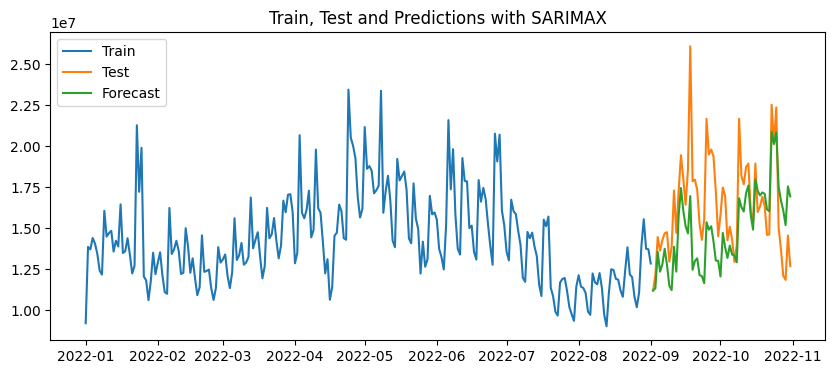

The MAE is 2397261.63
The MSE is 8855954258342.65
The MAPE is 14.29 %


In [88]:
# Model assessment
model_assessment(train['y']['2022':], test['y'], predictions_sarimax, "SARIMAX")

In [90]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

In [92]:
model_triple = ExponentialSmoothing(train['y'],
                                    trend = 'add',
                                    seasonal = "mul",
                                    seasonal_periods = 52).fit()

c:\Users\Nitish Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [93]:
predictions_triple = model_triple.forecast(len(test))
predictions_triple

2022-09-02    1.349432e+07
2022-09-03    1.265950e+07
2022-09-04    1.222582e+07
2022-09-05    1.177626e+07
2022-09-06    1.177362e+07
2022-09-07    1.214004e+07
2022-09-08    1.200742e+07
2022-09-09    1.221654e+07
2022-09-10    1.237867e+07
2022-09-11    1.275972e+07
2022-09-12    1.314615e+07
2022-09-13    1.357035e+07
2022-09-14    1.346938e+07
2022-09-15    1.348728e+07
2022-09-16    1.316198e+07
2022-09-17    1.308798e+07
2022-09-18    1.426889e+07
2022-09-19    1.416444e+07
2022-09-20    1.341888e+07
2022-09-21    1.386335e+07
2022-09-22    1.385122e+07
2022-09-23    1.386831e+07
2022-09-24    1.455334e+07
2022-09-25    1.420355e+07
2022-09-26    1.485440e+07
2022-09-27    1.546246e+07
2022-09-28    1.473815e+07
2022-09-29    1.454116e+07
2022-09-30    1.401898e+07
2022-10-01    1.419376e+07
2022-10-02    1.390025e+07
2022-10-03    1.452040e+07
2022-10-04    1.591040e+07
2022-10-05    1.323519e+07
2022-10-06    1.315439e+07
2022-10-07    1.337145e+07
2022-10-08    1.297657e+07
2

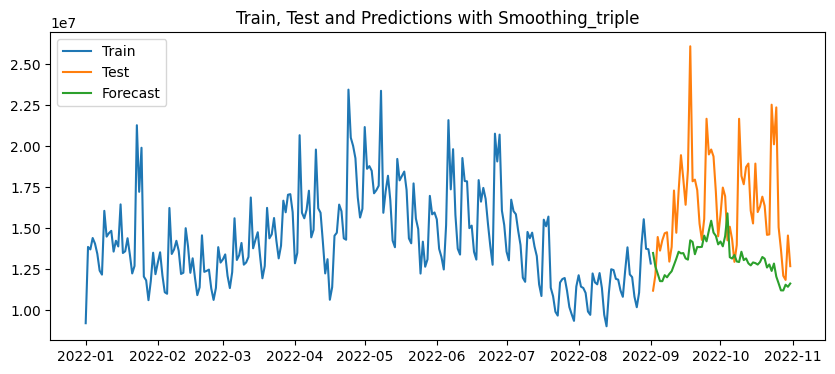

The MAE is 3474176.94
The MSE is 18399845026368.43
The MAPE is 19.46 %


In [96]:
# Model assessment
model_assessment(train['y']['2022':], test['y'], predictions_triple, "Smoothing_triple")

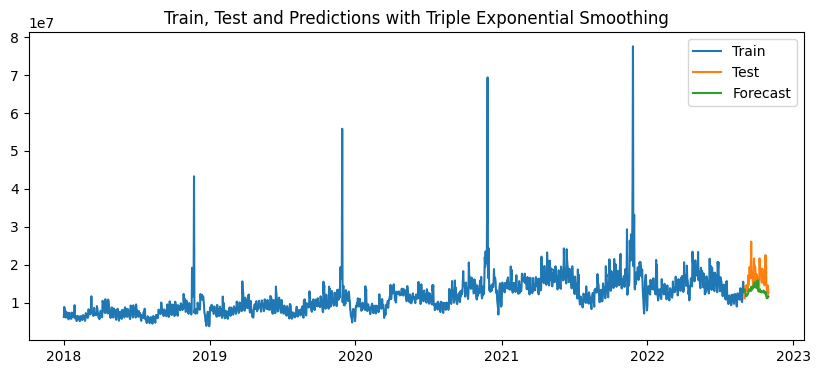

In [95]:
plt.figure(figsize = (10,4))

# Plot train, test, and forecasts values
plt.plot(train['y'], label = 'Train')
plt.plot(test['y'], label = 'Test')
plt.plot(predictions_triple, label = "Forecast")

# add title and legend to the plot
plt.title("Train, Test and Predictions with Triple Exponential Smoothing")
plt.legend()
plt.show()